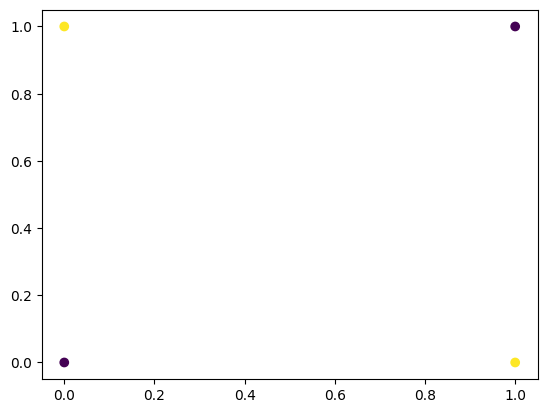

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

samples_2d = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

C = 10

def basis_function(x):
    return np.array([x[0]**2, x[1]**2, C, np.sqrt(2) * x[0], np.sqrt(2) * x[1], np.sqrt(2) * C * x[0], np.sqrt(2) * C * x[1]])

samples_high_dim = np.array([basis_function(x) for x in samples_2d])

svm_model = svm.SVC(kernel='poly', degree=2, coef0=1, C=10)

svm_model.fit(samples_high_dim, np.array([0, 1, 1, 0]))  # XOR labels

plt.scatter(samples_2d[:, 0], samples_2d[:, 1], c=np.array([0, 1, 1, 0]), cmap='viridis', marker='o')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

#

Higher-dimensional samples:
[[0.         0.         1.         0.         0.         0.
  0.        ]
 [0.         1.         1.         0.         1.41421356 0.
  1.41421356]
 [1.         0.         1.         1.41421356 0.         1.41421356
  0.        ]
 [1.         1.         1.         1.41421356 1.41421356 1.41421356
  1.41421356]]

Learned weights:
[0. 0. 0. 0. 0. 0. 0.]

Learned intercept:
0.0


<ipython-input-7-9dc73cf37057>:41: RuntimeWarning: invalid value encountered in divide
  Z = (weights[0] * xx + weights[1] * yy + intercept) / -weights[2]  # Decision boundary
/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1454: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/local/lib/python3.10/dist-packages/matplotlib/contour.py:1455: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


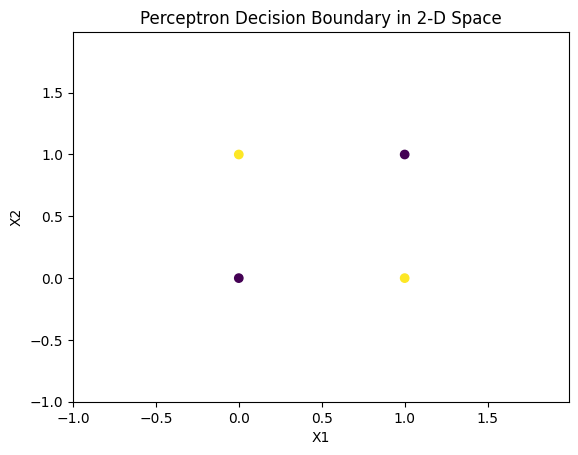

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

samples_2d = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

C = 1

def basis_function(x):
    return np.array([x[0]**2, x[1]**2, C, np.sqrt(2) * x[0], np.sqrt(2) * x[1], np.sqrt(2) * C * x[0], np.sqrt(2) * C * x[1]])

samples_high_dim = np.array([basis_function(x) for x in samples_2d])

print("Higher-dimensional samples:")
print(samples_high_dim)

perceptron = Perceptron(max_iter=1000)
perceptron.fit(samples_high_dim, np.array([0, 1, 1, 0]))  # XOR labels

weights = perceptron.coef_[0]
intercept = perceptron.intercept_[0]

print("\nLearned weights:")
print(weights)
print("\nLearned intercept:")
print(intercept)

plt.scatter(samples_2d[:, 0], samples_2d[:, 1], c=np.array([0, 1, 1, 0]), cmap='viridis', marker='o')
x_min, x_max = samples_2d[:, 0].min() - 1, samples_2d[:, 0].max() + 1
y_min, y_max = samples_2d[:, 1].min() - 1, samples_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = (weights[0] * xx + weights[1] * yy + intercept) / -weights[2]
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.title('Perceptron Decision Boundary in 2-D Space')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
